# European Social Survey Statistical Analysis

Using the results from the 2012 and 2014 [European Social Survey](http://www.europeansocialsurvey.org/data/round-index.html), we will answer some specific questions using statistical inference tests.  Meta-data for this survey lives [here](https://thinkful-ed.github.io/data-201-resources/ESS_practice_data/ESS_codebook.html).

The same participants answered questions in 2012 and 2014.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

%matplotlib inline
sns.set_style('whitegrid')

In [6]:
# Load the data
url = 'https://raw.githubusercontent.com/Thinkful-Ed/data-201-resources/master/ESS_practice_data/ESSdata_Thinkful.csv'
ess = pd.read_csv(url)


In [7]:
ess.head()

,cntry,idno,year,tvtot,ppltrst,pplfair,pplhlp,happy,sclmeet,sclact,gndr,agea,partner
0,CH,5.0,6,3.0,3.0,10.0,5.0,8.0,5.0,4.0,2.0,60.0,1.0
1,CH,25.0,6,6.0,5.0,7.0,5.0,9.0,3.0,2.0,2.0,59.0,1.0
2,CH,26.0,6,1.0,8.0,8.0,8.0,7.0,6.0,3.0,1.0,24.0,2.0
3,CH,28.0,6,4.0,6.0,6.0,7.0,10.0,6.0,2.0,2.0,64.0,1.0
4,CH,29.0,6,5.0,6.0,7.0,5.0,8.0,7.0,2.0,2.0,55.0,1.0


In [8]:
ess.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8594 entries, 0 to 8593
Data columns (total 13 columns):
cntry      8594 non-null object
idno       8594 non-null float64
year       8594 non-null int64
tvtot      8586 non-null float64
ppltrst    8580 non-null float64
pplfair    8555 non-null float64
pplhlp     8569 non-null float64
happy      8563 non-null float64
sclmeet    8579 non-null float64
sclact     8500 non-null float64
gndr       8584 non-null float64
agea       8355 non-null float64
partner    8577 non-null float64
dtypes: float64(11), int64(1), object(1)
memory usage: 872.9+ KB


We don't have many missing values, so let's just drop those.

In [10]:
ess.dropna(inplace=True)

In [12]:
# Un-encoding the year
ess['year'] = np.where(ess['year'] == 6, 2012, 2014)

## Question 1

Did people become less trusting from 2012 to 2014? Compute results for each country in the sample.

In [14]:
# Identifying the countries in the dataset
ess['cntry'].value_counts()

ES    2292
SE    1726
CH    1475
NO    1420
CZ    1207
DE      27
Name: cntry, dtype: int64

In [15]:
countries = ess['cntry'].unique()

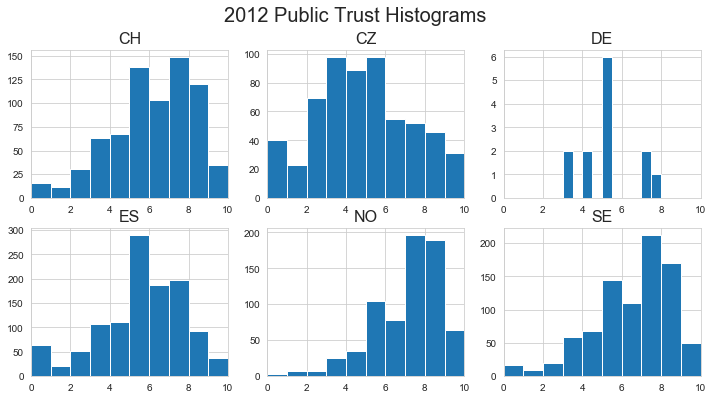

In [22]:
# Distributions per country of public trust in 2012
ppltrst_2012 = ess[['cntry', 'ppltrst']][ess['year'] == 2012]

plt.figure(figsize=(12,6))
plt.suptitle('2012 Public Trust Histograms', size=20)
idx = 1
for cntry in countries:
    trst = ppltrst_2012['ppltrst'][ppltrst_2012['cntry'] == cntry]
    plt.subplot(2,3,idx)
    plt.hist(trst)
    plt.xlim(0,10)
    plt.title(cntry, size=16)
    idx += 1

plt.show()

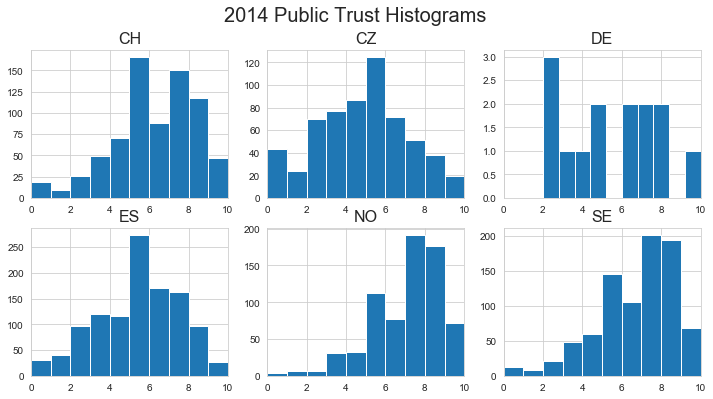

In [23]:
# Distributions per country of public trust in 2014
ppltrst_2014 = ess[['cntry', 'ppltrst']][ess['year'] == 2014]

plt.figure(figsize=(12,6))
plt.suptitle('2014 Public Trust Histograms', size=20)
idx = 1
for cntry in countries:
    trst = ppltrst_2014['ppltrst'][ppltrst_2014['cntry'] == cntry]
    plt.subplot(2,3,idx)
    plt.hist(trst)
    plt.xlim(0,10)
    plt.title(cntry, size=16)
    idx += 1

plt.show()

Some of these (looking at you Germany) don't seem very normally distributed, but on the whole, I think it's probably a reasonable assumption.  Let's use the paired t-test to see if the responses are significantly different.

In [43]:
# Running through the Related T-Tests for each country
print('Country\t\t\t\tT-test statistic\t\tp-value')
for cntry in countries:
    trst_2012 = ppltrst_2012['ppltrst'][ppltrst_2012['cntry'] == cntry]
    trst_2014 = ppltrst_2014['ppltrst'][ppltrst_2014['cntry'] == cntry]
    
    trst_2012 = trst_2012.tolist()
    trst_2014 = trst_2014.tolist()
    
    # Dealing with unequal list lengths
    maxid = len(trst_2012)
    if len(trst_2014) < maxid:
        maxid = len(trst_2014)
    
    ttest = stats.ttest_rel(trst_2012[:maxid], trst_2014[:maxid])
    
    print(cntry, ': ', ttest)

Country				T-test statistic		p-value
CH :  Ttest_relResult(statistic=-0.685503936789268, pvalue=0.4932433040188394)
CZ :  Ttest_relResult(statistic=0.3309358230335794, pvalue=0.7408085007445435)
DE :  Ttest_relResult(statistic=-0.6684373647831918, pvalue=0.5165064656723359)
ES :  Ttest_relResult(statistic=2.1512250255992353, pvalue=0.03166935799305661)
NO :  Ttest_relResult(statistic=0.5462752312298897, pvalue=0.5850490996185177)
SE :  Ttest_relResult(statistic=-2.074422015535839, pvalue=0.0383378027404032)


So it looks like we only have confidence that Spain and Sweden have significantly different distributions across the years.  Let's check those out to see if they went up or down.

In [46]:
EStrst_2012 = ppltrst_2012['ppltrst'][ppltrst_2012['cntry'] == 'ES'].mean()
EStrst_2014 = ppltrst_2014['ppltrst'][ppltrst_2014['cntry'] == 'ES'].mean()

SEtrst_2012 = ppltrst_2012['ppltrst'][ppltrst_2012['cntry'] == 'SE'].mean()
SEtrst_2014 = ppltrst_2014['ppltrst'][ppltrst_2014['cntry'] == 'SE'].mean()

print('Country\t\t2012\t\t2014')
print('Spain: ', EStrst_2012, EStrst_2014)
print('Sweden: ', SEtrst_2012, SEtrst_2014)

Country		2012		2014
Spain:  5.127806563039724 4.940035273368607
Sweden:  6.043073341094296 6.239907727797001


Spain's public trust went down from 2012 to 2014, while Sweden's went up.

While we can't be statistically confident about the other results, let's plot those as well.

In [47]:
print('Country\t\t2012\t\t2014')
for cntry in countries:
    cntry_2012 = ppltrst_2012['ppltrst'][ppltrst_2012['cntry'] == cntry].mean()
    cntry_2014 = ppltrst_2014['ppltrst'][ppltrst_2014['cntry'] == cntry].mean()
    
    print(cntry, ': ', cntry_2012, cntry_2014)


Country		2012		2014
CH :  5.685792349726776 5.764468371467026
CZ :  4.402662229617304 4.356435643564357
DE :  5.076923076923077 5.357142857142857
ES :  5.127806563039724 4.940035273368607
NO :  6.648305084745763 6.599719101123595
SE :  6.043073341094296 6.239907727797001


And now for the full European dataset as a whole

In [48]:
full_trst_2012 = ppltrst_2012['ppltrst'].mean()
full_trst_2014 = ppltrst_2014['ppltrst'].mean()
    
print('Europe: ', full_trst_2012, full_trst_2014)

Europe:  5.578481945467944 5.5713935230618254


On the whole, public trust went down slightly, led by Spain.

## Question 2

Did people become happier from 2012 to 2014? Compare results for each country in the sample.

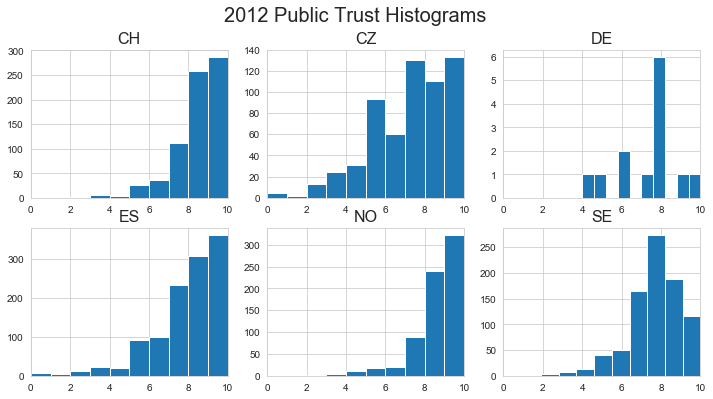

In [49]:
# Distributions per country of happiness in 2012
happy_2012 = ess[['cntry', 'happy']][ess['year'] == 2012]

plt.figure(figsize=(12,6))
plt.suptitle('2012 Public Trust Histograms', size=20)
idx = 1
for cntry in countries:
    hppy = happy_2012['happy'][happy_2012['cntry'] == cntry]
    plt.subplot(2,3,idx)
    plt.hist(hppy)
    plt.xlim(0,10)
    plt.title(cntry, size=16)
    idx += 1

plt.show()

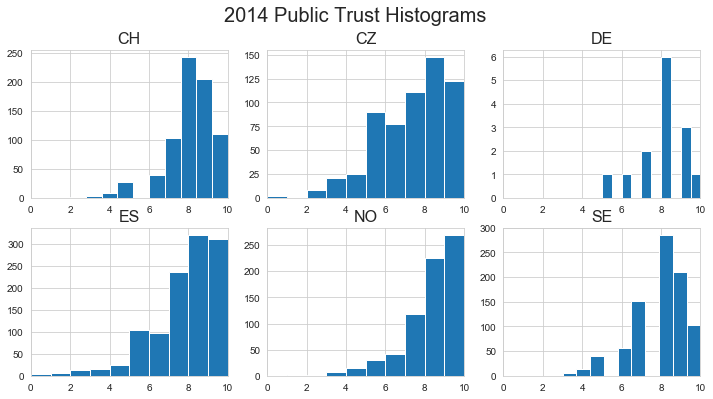

In [50]:
# Distributions per country of happiness in 2014
happy_2014 = ess[['cntry', 'happy']][ess['year'] == 2014]

plt.figure(figsize=(12,6))
plt.suptitle('2014 Public Trust Histograms', size=20)
idx = 1
for cntry in countries:
    hppy = happy_2014['happy'][happy_2014['cntry'] == cntry]
    plt.subplot(2,3,idx)
    plt.hist(hppy)
    plt.xlim(0,10)
    plt.title(cntry, size=16)
    idx += 1

plt.show()

These are decidedly not normal distributions.  It also seems like the majority of countries became _less_ happy from 2012 to 2014.  Let's first check the change in mean and medians.

In [51]:
print('***       Mean     ***')
print('Country\t\t2012\t\t2014')
for cntry in countries:
    cntry_2012 = happy_2012['happy'][happy_2012['cntry'] == cntry].mean()
    cntry_2014 = happy_2014['happy'][happy_2014['cntry'] == cntry].mean()
    
    print(cntry, ': ', cntry_2012, cntry_2014)


***       Mean     ***
Country		2012		2014
CH :  8.083333333333334 8.142664872139973
CZ :  6.790349417637271 6.922442244224422
DE :  7.3076923076923075 7.857142857142857
ES :  7.557858376511226 7.450617283950617
NO :  8.252824858757062 7.919943820224719
SE :  7.90104772991851 7.9388696655132645


In [52]:
print('***     Median     ***')
print('Country\t\t2012\t\t2014')
for cntry in countries:
    cntry_2012 = happy_2012['happy'][happy_2012['cntry'] == cntry].median()
    cntry_2014 = happy_2014['happy'][happy_2014['cntry'] == cntry].median()
    
    print(cntry, ': ', cntry_2012, cntry_2014)


***     Median     ***
Country		2012		2014
CH :  8.0 8.0
CZ :  7.0 7.0
DE :  8.0 8.0
ES :  8.0 8.0
NO :  8.0 8.0
SE :  8.0 8.0


Interestingly, 4 of the 6 countries have higher mean happiness scores in 2014 than 2012.  The median, being an integer, didn't move at all.  Let's test the statistical significance of the distribution shifts using a nonparametric test -- the **Wilcoxon signed-rank test** which is the non-parametric version of the paired T-test.

In [55]:
print('Country\tW\t\tp-value')
for cntry in countries:
    hppy_2012 = happy_2012['happy'][happy_2012['cntry'] == cntry]
    hppy_2014 = happy_2014['happy'][happy_2014['cntry'] == cntry]
    
    hppy_2012 = hppy_2012.tolist()
    hppy_2014 = hppy_2014.tolist()
    
    # Dealing with unequal list lengths
    maxid = len(hppy_2012)
    if len(hppy_2014) < maxid:
        maxid = len(hppy_2014)
    
    # Wilcoxon Test
    w, p = stats.wilcoxon(hppy_2012[:maxid], hppy_2014[:maxid])
    
    print(cntry, ': ', w, '\t', p)

Country	W		p-value
CH :  72908.5 	 0.5767042949680168
CZ :  61773.5 	 0.38263492515573405
DE :  17.0 	 0.5071224553598253
ES :  212608.0 	 0.17284338638135865
NO :  64696.0 	 1.6078039491474595e-05
SE :  110648.0 	 0.72351428366515


/Users/mkfrancsis/anaconda3/lib/python3.7/site-packages/scipy/stats/morestats.py:2388: UserWarning: Warning: sample size too small for normal approximation.
  warnings.warn("Warning: sample size too small for normal approximation.")


We can only be confident of Norway's decrease in happiness.

## Question 3

Who reported watching more TV in 2012, men or women?

In [57]:
# TV watching in 2012
men_tv_2012 = ess['tvtot'][(ess['year'] == 2012) & (ess['gndr'] == 1)]
women_tv_2012 = ess['tvtot'][(ess['year'] == 2012) & (ess['gndr'] == 2)]


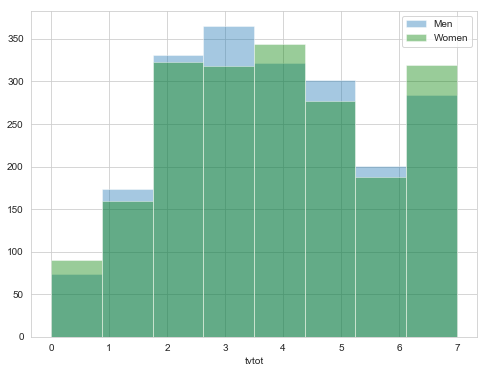

In [67]:
plt.figure(figsize=(8,6))
sns.distplot(men_tv_2012, hist=True, kde=False, bins=8)
sns.distplot(women_tv_2012, hist=True, kde=False, bins=8, color='g')
plt.legend(['Men', 'Women'])
plt.show()

The data is normal-ish.  It also seems like Women watched more TV then Men. We'll check normality using Shapiro-Wilks before looking at some box plots.

In [68]:
print('Men: ', stats.shapiro(men_tv_2012))
print('Women: ', stats.shapiro(women_tv_2012))

Men:  (0.9443334937095642, 3.718612884828085e-27)
Women:  (0.9407297372817993, 1.0867231118970029e-27)


Yup, definitely normal.

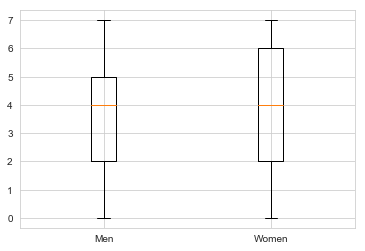

In [79]:
plt.boxplot([men_tv_2012, women_tv_2012])
plt.xticks([1,2],['Men', 'Women'])
plt.show()

In [94]:
print('Mean TV watching in 2012')
print('Men: ', men_tv_2012.mean())
print('Women: ', women_tv_2012.mean())

Mean TV watching in 2012
Men:  3.8592303945445687
Women:  3.9053518334985133


Women watched more TV than men in 2012.  Let's see if we can have confidence in this answer using a T-Test.

In [95]:
stats.ttest_ind(men_tv_2012, women_tv_2012)

Ttest_indResult(statistic=-0.7323552192640558, pvalue=0.4639939646110154)

The sample populations are not significantly different from each other.

## Question 4

Who was more likely to believe people were fair in 2012, people living with a partner or people living alone?

In [98]:
alone_pplfair_2012 = ess['pplfair'][(ess['year'] == 2012) & (ess['partner'] == 2)]
partner_pplfair_2012 = ess['pplfair'][(ess['year'] == 2012) & (ess['partner'] == 1)]

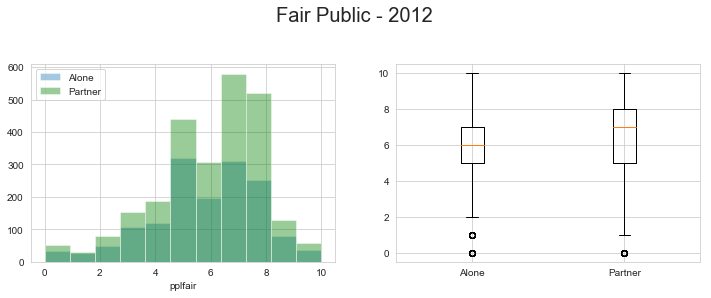

In [100]:
plt.figure(figsize=(12,8))
plt.suptitle('Fair Public - 2012', size=20)

plt.subplot(221)
sns.distplot(alone_pplfair_2012, hist=True, kde=False, bins=11)
sns.distplot(partner_pplfair_2012, hist=True, kde=False, bins=11, color='g')
plt.legend(['Alone', 'Partner'])

plt.subplot(222)
plt.boxplot([alone_pplfair_2012, partner_pplfair_2012])
plt.xticks([1,2],['Alone', 'Partner'])

plt.show()


While the histograms make it look like the two groups have identical, near-normal distributions, obviously the boxplots show this to be false.  Let's check the normality using Shapiro-Wilks before calculating the mean and following up with a T-Test.

In [101]:
print('Alone: ', stats.shapiro(alone_pplfair_2012))
print('Partner: ', stats.shapiro(partner_pplfair_2012))

Alone:  (0.9547916650772095, 2.436869843664993e-21)
Partner:  (0.9396088123321533, 5.344745707680362e-31)


In [102]:
print('Public thoughts on fairness in society, 2012')
print('Alone: ', alone_pplfair_2012.mean())
print('Partner: ', partner_pplfair_2012.mean())

Public thoughts on fairness in society, 2012
Alone:  5.86592544146501
Partner:  6.0743509047993705


In [103]:
stats.ttest_ind(alone_pplfair_2012, partner_pplfair_2012)

Ttest_indResult(statistic=-3.0430439318464235, pvalue=0.002356936676939248)

These are normal distributions.  People with a partner feel that life is fairer than those living alone.  And the T-Test results mean that we can say this with confidence.  

## Question 5

Pick three countries and compare how often people met socially in 2014.  Are there differences, and if so which countries stand out?

We'll select:
- Spain (ES)
- Sweden (SE)
- Czech Republic (CZ)

In [104]:
es_sclmeet_2014 = ess['sclmeet'][(ess['year'] == 2014) & (ess['cntry'] == 'ES')]
se_sclmeet_2014 = ess['sclmeet'][(ess['year'] == 2014) & (ess['cntry'] == 'SE')]
cz_sclmeet_2014 = ess['sclmeet'][(ess['year'] == 2014) & (ess['cntry'] == 'CZ')]

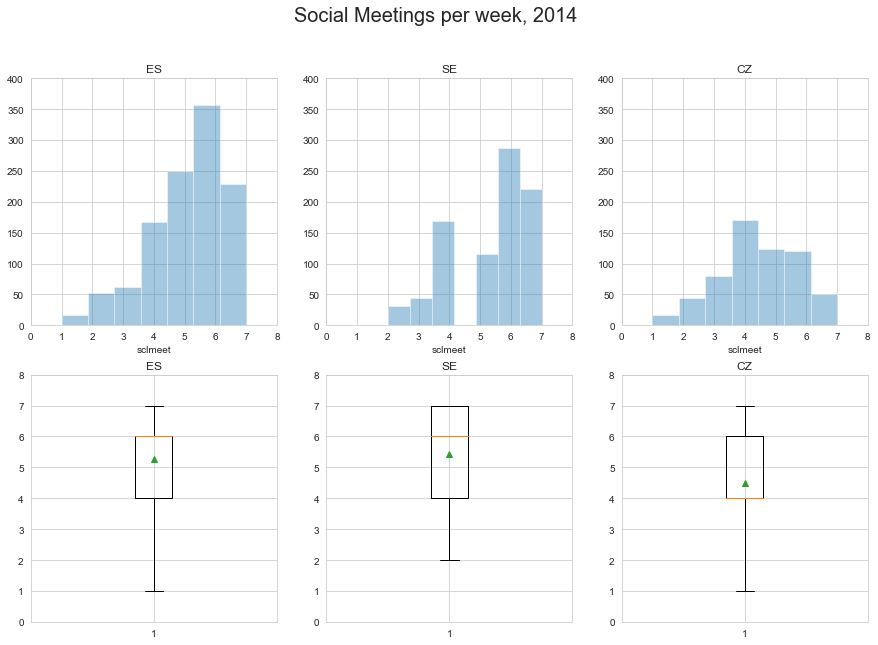

In [109]:
sclmeet_cntry = ['ES', 'SE', 'CZ']
sclmeet_data = [es_sclmeet_2014, se_sclmeet_2014, cz_sclmeet_2014]
idx = 0

plt.figure(figsize=(15,10))
plt.suptitle('Social Meetings per week, 2014', size=20)
for cntry in sclmeet_cntry:
    plt.subplot(2,3,(idx + 1))
    sns.distplot(sclmeet_data[idx], hist=True, kde=False, bins=7)
    plt.ylim(0,400)
    plt.xlim(0,8)
    plt.title(cntry)
    
    plt.subplot(2,3,(idx+4))
    plt.boxplot(sclmeet_data[idx], showmeans=True)
    plt.ylim(0,8)
    plt.title(cntry)

    idx += 1
plt.show()

These don't look like normal distributions, save for the Czech Republic.  Let's check.

In [111]:
for c, d in zip(sclmeet_cntry, sclmeet_data):
    print(c, ': ', stats.shapiro(d))

ES :  (0.8927679657936096, 2.280180298346974e-27)
SE :  (0.8782685399055481, 1.7535298169699071e-25)
CZ :  (0.9442528486251831, 2.5791458676876697e-14)


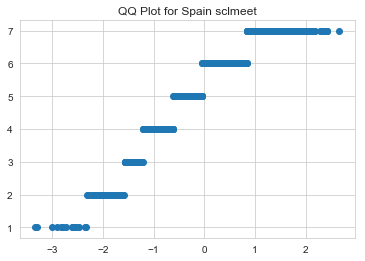

In [123]:
rand_norm = np.random.normal(size=len(es_sclmeet_2014))
rand_norm = sorted(rand_norm)
es_sclmeet_2014_sorted = sorted(es_sclmeet_2014)

plt.scatter(rand_norm, es_sclmeet_2014_sorted)
plt.title('QQ Plot for Spain sclmeet')
plt.show()

The Shapiro-Wilks test and a QQ plot for the Spanish data, say that the data is, in fact, normal.  So, let's compare the groups using the parametric One-way ANOVA test.

In [124]:
stats.f_oneway(es_sclmeet_2014, se_sclmeet_2014, cz_sclmeet_2014)

F_onewayResult(statistic=85.03811666631786, pvalue=1.67652480854007e-36)

Looks like we do have significant differences between our sample groups.  We'll run the full suite of comparative T-Tests to check if they are all different from one another.

In [130]:
es_se = stats.ttest_ind(es_sclmeet_2014, se_sclmeet_2014)
es_cz = stats.ttest_ind(es_sclmeet_2014, cz_sclmeet_2014)
se_cz = stats.ttest_ind(se_sclmeet_2014, cz_sclmeet_2014)

print('Country Tests\t\tT-Test Stat\t\tp-value')
print('Spain - Sweden: ', es_se[0], es_se[1])
print('Spain - Czech Republic: ', es_cz[0], es_cz[1])
print('Sweden - Czech Republic: ', se_cz[0], se_cz[1])

Country Tests		T-Test Stat		p-value
Spain - Sweden:  -2.6925202988475645 0.0071506085242787525
Spain - Czech Republic:  10.538036641317998 3.262659263756715e-25
Sweden - Czech Republic:  12.562023116127296 1.86957819627182e-34


Looks like they are all different from one another.

## Question 6

Pick three countries and compare how often people took part in social activities, relative to others their age, in 2014.  Are there differences, and if so, which countries stand out?

We'll stick with:
- Spain (ES)
- Sweden (SE)
- Czech Republic (CZ)

In [139]:
es_sclact_2014 = ess[['sclact', 'agea']][(ess['year'] == 2014) & (ess['cntry'] == 'ES')]
se_sclact_2014 = ess[['sclact', 'agea']][(ess['year'] == 2014) & (ess['cntry'] == 'SE')]
cz_sclact_2014 = ess[['sclact', 'agea']][(ess['year'] == 2014) & (ess['cntry'] == 'CZ')]

sclact_cntry = sclmeet_cntry
sclact_data = [es_sclact_2014, se_sclact_2014, cz_sclact_2014]

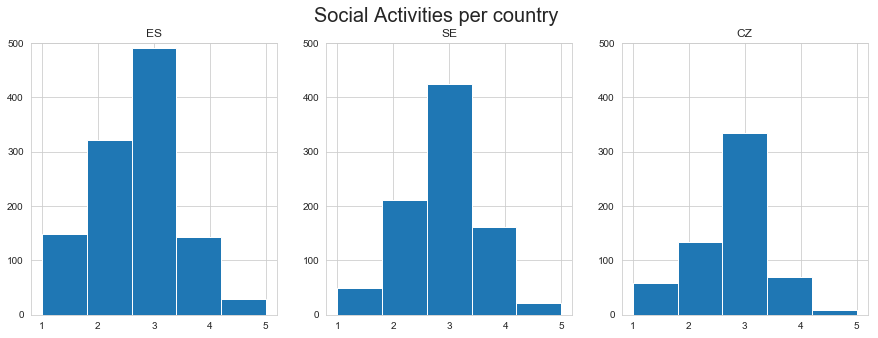

In [147]:
plt.figure(figsize=(15,5))
plt.suptitle('Social Activities per country', size=20)
idx = 1 
for c, d in zip(sclact_cntry, sclact_data):
    plt.subplot(1,3,idx)
    plt.hist(d['sclact'], bins=5)
    plt.ylim(0,500)
    plt.title(c)
    idx += 1
plt.show()

/Users/mkfrancsis/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


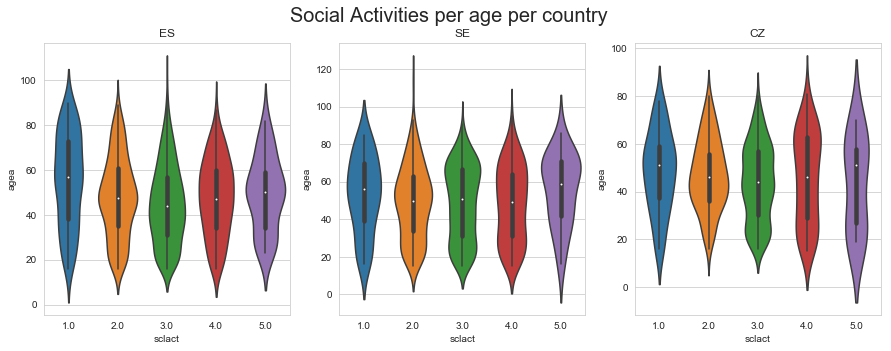

In [150]:
plt.figure(figsize=(15,5))
plt.suptitle('Social Activities per age per country', size=20)
idx = 1 
for c, d in zip(sclact_cntry, sclact_data):
    plt.subplot(1,3,idx)
    sns.violinplot(x='sclact', y='agea', data=d)
    plt.title(c)
    idx += 1
plt.show()

At the country level, the social activity responses are normal.  Across ages, within a particular country, the distributions probably aren't very normal, but we'll have to bin them and check.  First, let's see if the countries differ from one another significantly using the One-way ANOVA test and following up with T-tests, if neccessary.

In [152]:
stats.f_oneway(es_sclact_2014['sclact'], se_sclact_2014['sclact'], cz_sclact_2014['sclact'])

F_onewayResult(statistic=18.72253525151279, pvalue=8.44916211933399e-09)

In [153]:
es_se_sclact = stats.ttest_ind(es_sclact_2014['sclact'], se_sclact_2014['sclact'])
es_cz_sclact = stats.ttest_ind(es_sclact_2014['sclact'], cz_sclact_2014['sclact'])
se_cz_sclact = stats.ttest_ind(se_sclact_2014['sclact'], cz_sclact_2014['sclact'])

print('Country Tests\t\tT-Test Stat\t\tp-value')
print('Spain - Sweden: ', es_se_sclact[0], es_se_sclact[1])
print('Spain - Czech Republic: ', es_cz_sclact[0], es_cz_sclact[1])
print('Sweden - Czech Republic: ', se_cz_sclact[0], se_cz_sclact[1])

Country Tests		T-Test Stat		p-value
Spain - Sweden:  -6.012700644386077 2.163487662927079e-09
Spain - Czech Republic:  -2.127732025799766 0.03349971308846818
Sweden - Czech Republic:  3.308051048995222 0.0009621646490513099


We can confidently say that the respondants in different countries have different social habits.  

Now we will bin the populations by age.

In [148]:
print('Spain min & max ages: ', es_sclact_2014['agea'].min(), es_sclact_2014['agea'].max())
print('Sweden min & max ages: ', se_sclact_2014['agea'].min(), se_sclact_2014['agea'].max())
print('Czech min & max ages: ', cz_sclact_2014['agea'].min(), cz_sclact_2014['agea'].max())

Spain min & max ages:  16.0 101.0
Sweden min & max ages:  15.0 114.0
Czech min & max ages:  15.0 81.0


Let's use a bin size of twenty(ish) years.

Bins will be: `[15-34, 35-54, 55-74, 75-115]`

In [158]:
# Organizing the data, adding country features, and binning by age

for c, d in zip(sclact_cntry, sclact_data):
    # Adding a country label
    d['country'] = c
    
    # Binning by age
    def age_bin(x):
        if x < 35: 
            return 0 
        elif x < 55: 
            return 1
        elif x < 75: 
            return 2 
        else:
            return 3
    
    d['age_bin'] = d['agea'].apply(lambda x: age_bin(x))
    
all_sclact = pd.concat([es_sclact_2014, se_sclact_2014, cz_sclact_2014], ignore_index=True)

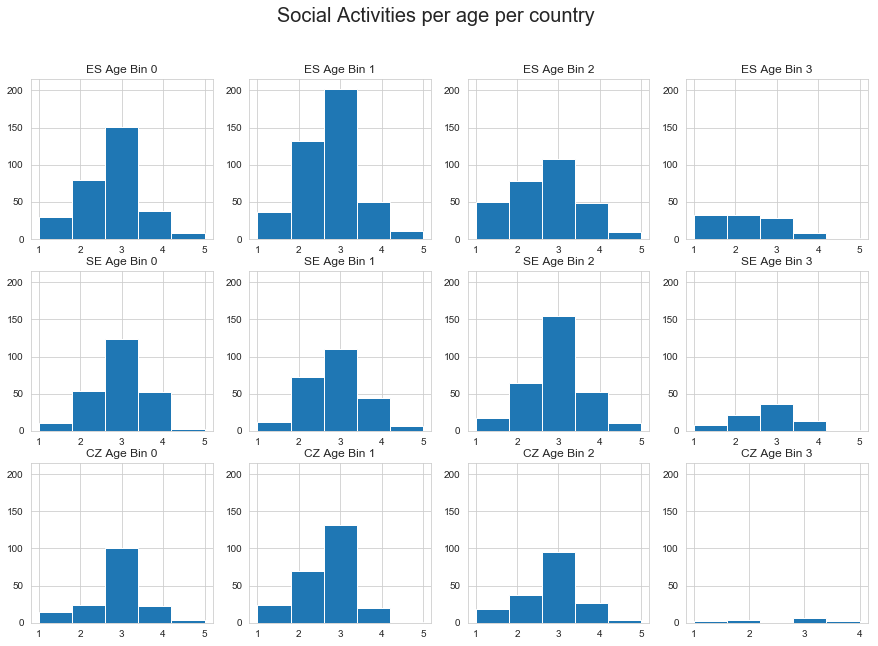

In [166]:
# Plotting all country/age bin group histograms

age_bins = [0, 1, 2, 3]
idx = 1

plt.figure(figsize=(15,10))
plt.suptitle('Social Activities per age per country', size=20)

for c in sclact_cntry:
    for a in age_bins:
        data = all_sclact['sclact'][(all_sclact['country'] == c) & (all_sclact['age_bin'] == a)]
        title = c + ' Age Bin ' + str(a)

        plt.subplot(3,4,idx)
        plt.hist(data, bins=5)
        plt.ylim(0,215)
        plt.title(title)

        idx += 1
plt.show()

These distributions look fairly normal and quite similar across the countries for a given age bin.  Let's run one-way ANOVA tests for age bins across the countries.

In [168]:
for a in age_bins:
    es_act = all_sclact['sclact'][(all_sclact['country'] == 'ES') & (all_sclact['age_bin'] == a)]
    se_act = all_sclact['sclact'][(all_sclact['country'] == 'SE') & (all_sclact['age_bin'] == a)]
    cz_act = all_sclact['sclact'][(all_sclact['country'] == 'CZ') & (all_sclact['age_bin'] == a)]
    
    print('Age Bin ' + str(a) + ':')
    print(stats.f_oneway(es_act, se_act, cz_act), '\n')

Age Bin 0:
F_onewayResult(statistic=4.199639109484491, pvalue=0.015374250873744683) 

Age Bin 1:
F_onewayResult(statistic=4.363680531740522, pvalue=0.012996297706240525) 

Age Bin 2:
F_onewayResult(statistic=7.230542749187299, pvalue=0.0007743520240890002) 

Age Bin 3:
F_onewayResult(statistic=8.226845995131313, pvalue=0.00037203393180584) 



We an be confident that there are differences between each age group in the countries, though let's discount the eldest age bin (3) because it contains _very_ few samples.

In [169]:
# T-tests for all country combinations in each age bin

for a in age_bins:
    # Data grouping
    es_act = all_sclact['sclact'][(all_sclact['country'] == 'ES') & (all_sclact['age_bin'] == a)]
    se_act = all_sclact['sclact'][(all_sclact['country'] == 'SE') & (all_sclact['age_bin'] == a)]
    cz_act = all_sclact['sclact'][(all_sclact['country'] == 'CZ') & (all_sclact['age_bin'] == a)]
    
    # T-tests
    es_se = stats.ttest_ind(es_act, se_act)
    es_cz = stats.ttest_ind(es_act, cz_act)
    se_cz = stats.ttest_ind(se_act, cz_act)
    
    print('Age Bin ' + str(a) + ':')
    print('Spain - Sweden: ', es_se[0], es_se[1])
    print('Spain - Czech: ', es_cz[0], es_cz[1])
    print('Sweden - Czech: ', se_cz[0], se_cz[1])
    print('\n')

Age Bin 0:
Spain - Sweden:  -2.786098099089736 0.00551945582870326
Spain - Czech:  -1.7352710076057567 0.08334828965958921
Sweden - Czech:  0.7128360042542766 0.47635672832100884


Age Bin 1:
Spain - Sweden:  -2.0915178906509393 0.03685540915827491
Spain - Czech:  1.123536756147294 0.2616084349403855
Sweden - Czech:  2.9743422001877025 0.003081600643280145


Age Bin 2:
Spain - Sweden:  -3.734086024313146 0.000206628435707174
Spain - Czech:  -1.76593862931733 0.07805393609074324
Sweden - Czech:  1.562388335506217 0.11885831933312495


Age Bin 3:
Spain - Sweden:  -4.061046089368947 7.281289501607133e-05
Spain - Czech:  -1.1290684483038058 0.2612186962399244
Sweden - Czech:  1.0429241073180424 0.29968693491710224




For Age Bin 0 (ages 15-34), only Spain and Sweden are indistinguishable.  The others, we can confidently state, are different.

For Age Bin 1 (ages 35-54), Spain and Czech Republic are indistinguishable.  The others are likely different.

For Age Bin 2 (ages 55-74), the combinations of Czech Republic/Spain and Czech Republic/Sweden are indistinguishable.  Spain and Sweden have statistically different distributions.

We won't disect Age Bin 3 due to small sample size.